In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_700_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.5_.5_.5_.5_.5_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_700_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.5_.5_.5_.5_.5_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 294.0

ng = 6

nref = 1

p_refs = (/ 700 /)

t_refs = (/ 250 /)

ng_refs = (/ 6 /)

data wgt
     &     /5 * .5, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 3e-25_8

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

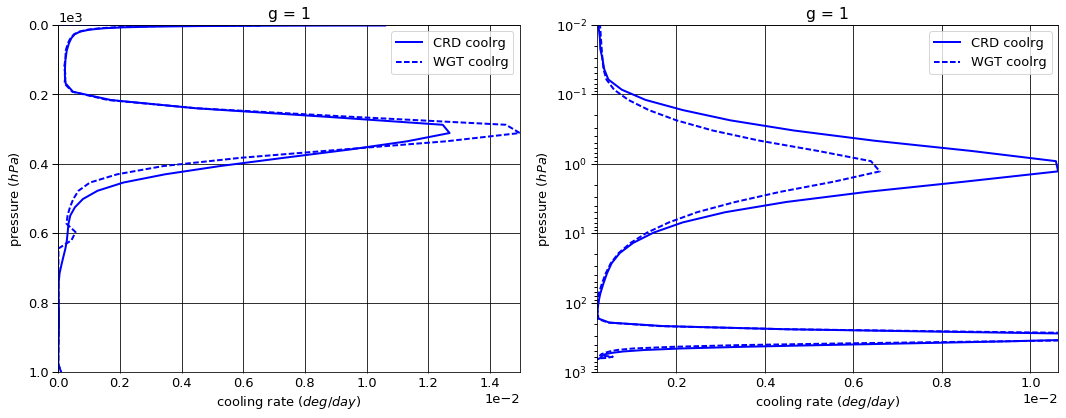

# Figure: cooling rate g-group 2

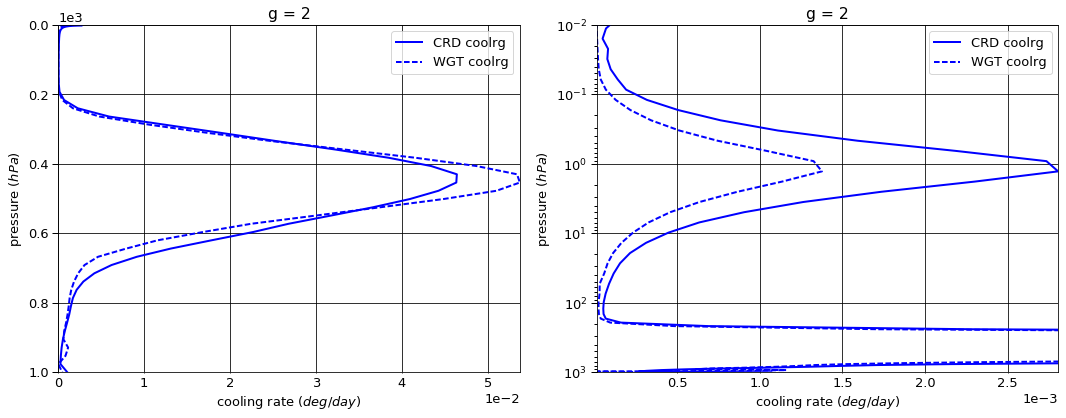

# Figure: cooling rate g-group 3

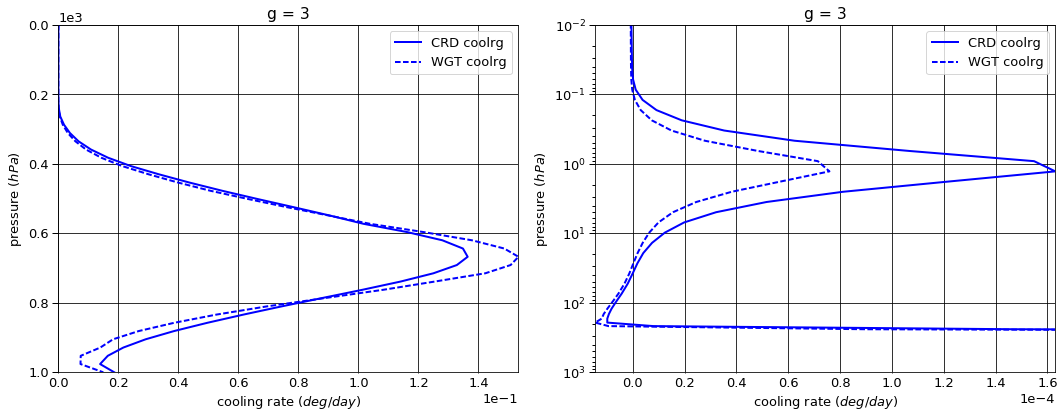

# Figure: cooling rate g-group 4

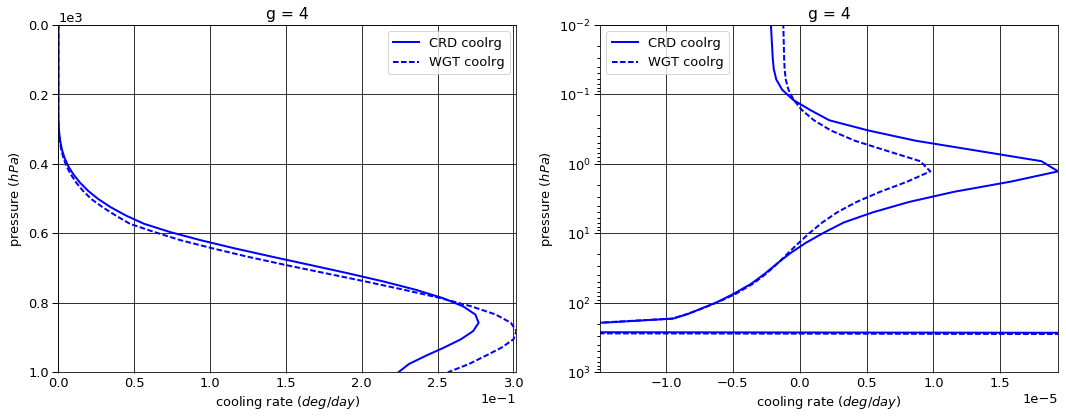

# Figure: cooling rate g-group 5

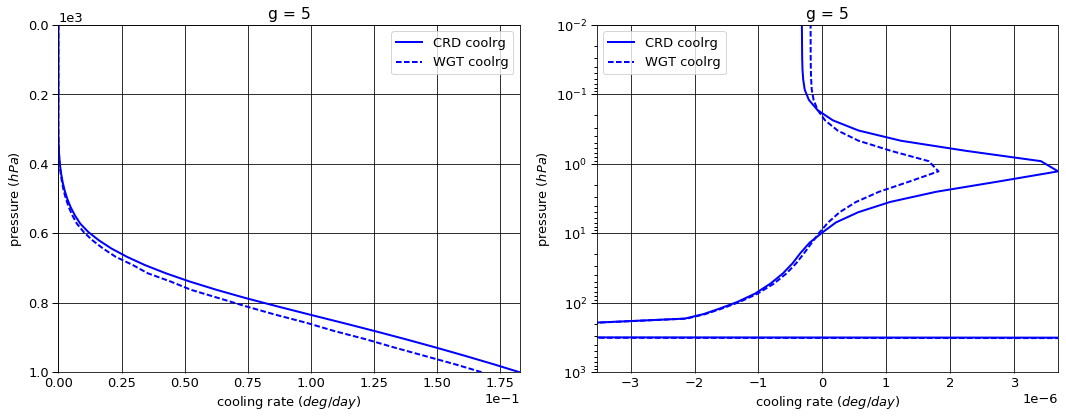

# Figure: cooling rate g-group 6

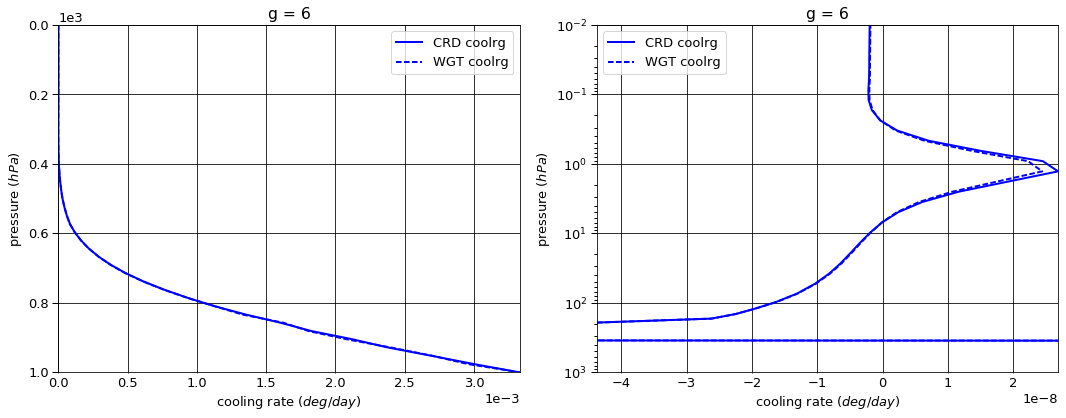

# Figure: cooling rate g-group total

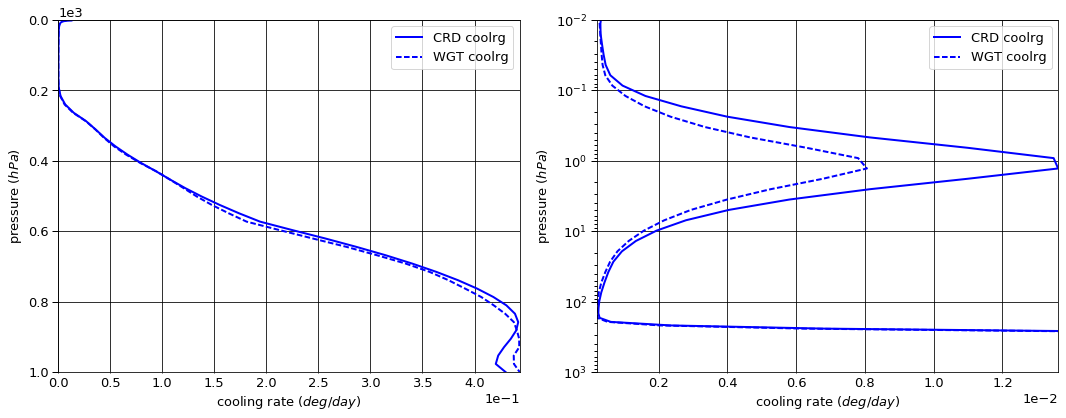

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.248559   0.000000  -0.248559
  1013.0   76     -0.532918   0.532648  -0.000270
2 0.0      1      -1.528569   0.000000  -1.528569
  1013.0   76     -2.582936   2.580169  -0.002767
3 0.0      1      -5.522140   0.000000  -5.522140
  1013.0   76     -7.281880   7.207163  -0.074716
4 0.0      1     -14.924342   0.000000 -14.924342
  1013.0   76    -16.671134  13.055589  -3.615545
5 0.0      1     -15.627656   0.000000 -15.627656
  1013.0   76    -16.088072   4.962374 -11.125698
6 0.0      1      -0.801749   0.000000  -0.801749
  1013.0   76     -0.807898   0.072825  -0.735073


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.243357   0.000000  -0.243357
  1013.0   76     -0.532918   0.532648  -0.000270
2 0.0      1      -1.509776   0.000000  -1.509776
  1013.0   76     -2.582936   2.581610  -0.001326
3 0.0      1      -5.503876   0.000000  -5.503876
  1013.0   76     -7.281880   7.231726  -0.050154
4 0.0      1     -15.015596   0.000000 -15.015596
  1013.0   76    -16.671134  13.274069  -3.397065
5 0.0      1     -15.687823   0.000000 -15.687823
  1013.0   76    -16.088072   4.361181 -11.726890
6 0.0      1      -0.801771   0.000000  -0.801771
  1013.0   76     -0.807898   0.072542  -0.735355


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.005202  0.000000  0.005202
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.018793  0.000000  0.018793
  1013.0   76     0.000000  0.001441  0.001441
3 0.0      1      0.018264  0.000000  0.018264
  1013.0   76     0.000000  0.024563  0.024563
4 0.0      1     -0.091254  0.000000 -0.091254
  1013.0   76     0.000000  0.218480  0.218480
5 0.0      1     -0.060167  0.000000 -0.060167
  1013.0   76     0.000000 -0.601192 -0.601192
6 0.0      1     -0.000022  0.000000 -0.000022
  1013.0   76     0.000000 -0.000283 -0.000283

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      5.481038e-05
  1001.112500 75     9.720372e-05
2 0.000312    1      2.397609e-05
  1001.112500 75     1.069061e-03
3 0.000312    1     -7.864619e-07
  1001.112500 75     1.862708e-02
4 0.000312    1     -2.426775e-06
  1001.112500 75     2.241952e-01
5 0.000312    1     -3.241000e-07
  1001.112500 75     1.827769e-01
6 0.000312    1     -1.820736e-09
  1001.112500 75     3.327172e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.622612e-04
  1001.112500 75     9.720372e-05
2 0.000312    1     -8.024630e-06
  1001.112500 75     4.780474e-04
3 0.000312    1     -7.916374e-07
  1001.112500 75     1.498499e-02
4 0.000312    1     -1.343280e-06
  1001.112500 75     2.567979e-01
5 0.000312    1     -1.831003e-07
  1001.112500 75     1.678186e-01
6 0.000312    1     -1.720168e-09
  1001.112500 75     3.330782e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.074509e-04
  1001.112500 75     0.000000e+00
2 0.000312    1     -3.200072e-05
  1001.112500 75    -5.910140e-04
3 0.000312    1     -5.175510e-09
  1001.112500 75    -3.642085e-03
4 0.000312    1      1.083495e-06
  1001.112500 75     3.260276e-02
5 0.000312    1      1.409997e-07
  1001.112500 75    -1.495839e-02
6 0.000312    1      1.005683e-10
  1001.112500 75     3.609900e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.653016,0.000000,-38.653016
1013.0,76,-43.964837,28.410768,-15.554069



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.762200,0.000000,-38.76220
1013.0,76,-43.964837,28.053777,-15.91106



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.109184,0.000000,-0.109184
1013.0,76,0.000000,-0.356992,-0.356991


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000075
1001.112500,75,0.430093



WGT


,,coolrg
pressure,layer,
0.000312,1,0.000152
1001.112500,75,0.443508



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000077
1001.112500,75,0.013415


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.01200,0.012285
2,0.05855,0.059022
3,0.16500,0.166498
4,0.37780,0.381078
5,0.36765,0.363444
6,0.01900,0.017672


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.126459e-21
2,1.439318e-22
3,1.839069e-23
4,2.349846e-24
5,3.002484e-25
6,1.525001e-25


In [23]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [6]
    p_refs = [700]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.126459e-21,NaN,0.01200,0.012285,0.01200,0.012285,700.0
2,1.439318e-22,0.127774,0.05855,0.059022,0.07055,0.071308,700.0
3,1.839069e-23,0.127774,0.16500,0.166498,0.23555,0.237806,700.0
4,2.349846e-24,0.127774,0.37780,0.381078,0.61335,0.618884,700.0
5,3.002484e-25,0.127774,0.36765,0.363444,0.98100,0.982328,700.0
6,1.525001e-25,0.507913,0.01900,0.017672,1.00000,1.000000,700.0


In [25]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [26]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  2.529675e-21  4.731124e-23  53.468808
      2     0.000312  1.142661e-22  1.642213e-24  69.580564
      3     0.000312  4.596071e-25  4.662672e-26   9.857162
      4     0.000312  2.007353e-25  1.026550e-26  19.554369
      5     0.000312  2.157519e-26  1.110296e-27  19.431925
      6     0.000312  1.953542e-27  8.591929e-28   2.273694
2     1     0.000750  2.545741e-21  4.740327e-23  53.703917
      2     0.000750  1.149511e-22  1.646531e-24  69.814089
      3     0.000750  4.663413e-25  4.678619e-26   9.967499
      4     0.000750  2.015475e-25  1.030216e-26  19.563621
      5     0.000750  2.171568e-26  1.115195e-27  19.472532
      6     0.000750  1.974418e-27  8.645518e-28   2.283748
3     1     0.001052  2.580177e-21  4.757275e-23  54.236454
      2     0.001052  1.164207e-22  1.654370e-24  70.371620
      3     0.001052  4.809231e-25  4.709638e-26  10.211468
      4     0.001052  2.032872e-25  1.037436e-26  19.595152
      5     0.001052  2.201761e-26  1.124904e-27  19.572886
      6     0.001052  2.019245e-27  8.757581e-28   2.305711
4     1     0.001476  2.617039e-21  4.775752e-23  54.798481
      2     0.001476  1.179952e-22  1.663069e-24  70.950260
      3     0.001476  4.968406e-25  4.743316e-26  10.474541
      4     0.001476  2.051521e-25  1.045211e-26  19.627816
      5     0.001476  2.234324e-26  1.135432e-27  19.678188
      6     0.001476  2.067847e-27  8.876514e-28   2.329571
5     1     0.002070  2.654353e-21  4.795085e-23  55.355695
      2     0.002070  1.195902e-22  1.672352e-24  71.510151
      3     0.002070  5.132840e-25  4.778259e-26  10.742071
      4     0.002070  2.070432e-25  1.053193e-26  19.658628
      5     0.002070  2.267549e-26  1.146316e-27  19.781180
      6     0.002070  2.117726e-27  8.995982e-28   2.354080
6     1     0.002904  2.692079e-21  4.815580e-23  55.903517
      2     0.002904  1.212042e-22  1.682399e-24  72.042469
      3     0.002904  5.302563e-25  4.814860e-26  11.012912
      4     0.002904  2.089592e-25  1.061445e-26  19.686299
      5     0.002904  2.301424e-26  1.157649e-27  19.880153
      6     0.002904  2.168894e-27  9.116031e-28   2.379208
7     1     0.004074  2.730212e-21  4.837696e-23  56.436203
      2     0.004074  1.228369e-22  1.693470e-24  72.535653
      3     0.004074  5.477765e-25  4.853709e-26  11.285729
      4     0.004074  2.109005e-25  1.070069e-26  19.709062
      5     0.004074  2.335970e-26  1.169573e-27  19.972849
      6     0.004074  2.221417e-27  9.236917e-28   2.404933
8     1     0.005714  2.768742e-21  4.862081e-23  56.945622
      2     0.005714  1.244880e-22  1.705932e-24  72.973565
      3     0.005714  5.658654e-25  4.895641e-26  11.558556
      4     0.005714  2.128677e-25  1.079208e-26  19.724438
      5     0.005714  2.371207e-26  1.182286e-27  20.056111
      6     0.005714  2.275380e-27  9.359040e-28   2.431211
9     1     0.008015  2.807660e-21  4.889654e-23  57.420423
      2     0.008015  1.261568e-22  1.720307e-24  73.333910
      3     0.008015  5.845501e-25  4.941841e-26  11.828590
      4     0.008015  2.148618e-25  1.089067e-26  19.728975
      5     0.008015  2.407167e-26  1.196075e-27  20.125554
      6     0.008015  2.330899e-27  9.483019e-28   2.457971
10    1     0.011243  2.846934e-21  4.921709e-23  57.844427
      2     0.011243  1.278420e-22  1.737320e-24  73.585718
      3     0.011243  6.038547e-25  4.993977e-26  12.091659
      4     0.011243  2.168832e-25  1.099933e-26  19.717859
      5     0.011243  2.443874e-26  1.211335e-27  20.175038
      6     0.011243  2.388104e-27  9.609722e-28   2.485092
11    1     0.015771  2.886521e-21  4.960071e-23  58.195165
      2     0.015771  1.295413e-22  1.757996e-24  73.686930
      3     0.015771  6.238075e-25  5.054414e-26  12.341835
      4     0.015771  2.189327e-25  1.112211e-26  19.684454
      5     0.015771  2.481356e-26  1.228630e-27  20

# Histogram of wavenumbers in g-group 1

In [27]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [28]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
